# Vanishing Gradient Problem in Deep Networks

The **vanishing gradient problem** is a common issue in training deep neural networks, especially in networks with many layers, such as recurrent neural networks (RNNs) and deep feedforward networks. This problem occurs when the gradients of the loss function with respect to the model parameters become very small as they are backpropagated through the network. As a result, weights in earlier layers (closer to the input) receive very small updates, making it difficult for the network to learn and slowing or even stalling the training process.

### How It Happens
During backpropagation, the gradient is calculated for each layer starting from the output layer and moving backward through the network. The gradient of each layer is affected by the gradients of subsequent layers. When the gradients are multiplied during backpropagation, they may shrink to a very small value, especially if the activation functions or weights tend to have values less than 1. This repeated multiplication of small values leads to an exponentially decreasing gradient, hence "vanishing."

## Simple Mathematical Illustration of the Vanishing Gradient Problem

Imagine a deep network with gradients at each layer around $ 0.1 $ to $ 0.2 $. During backpropagation, we multiply these gradients as they pass through layers.

1. Suppose we have a simple 3-layer network, and the gradients for each layer are:
   $$
   \frac{\partial L}{\partial z_3} = 0.1, \quad \frac{\partial z_3}{\partial z_2} = 0.1, \quad \frac{\partial z_2}{\partial z_1} = 0.2
   $$

2. The gradient for the first layer is calculated as:
   $$
   \frac{\partial L}{\partial z_1} = 0.1 \times 0.1 \times 0.2 = 0.002
   $$

3. Now, using this gradient, the weight update rule for a learning rate $ \eta = 0.1 $ and initial weight $ w_{\text{old}} = 1 $ is:
   $$
      w_{\text{new}} = w_{\text{old}} - \eta \times \frac{\partial L}{\partial w} = 1 - 0.1 \times 0.002 = 1 - 0.0002 = 0.9998
   $$

The change in $ w $ is only 0.0002, which is negligible. If such small changes continue, the weights hardly get updated, meaning the network "learns" very slowly or almost stops learning in earlier layers. This is the essence of the vanishing gradient problem.<p>

In deep networks, outputs from each layer are passed as inputs to the next. If activations are in the “saturated” region of sigmoid or tanh (where the gradient is close to zero), the gradients become very small. As gradients are multiplied during backpropagation, they shrink even more layer by layer, resulting in very tiny gradients for the initial layers.

## Why Sigmoid and Tanh Are Prone to the Vanishing Gradient Problem

### Theoretical Explanation
Both **sigmoid** and **tanh** functions compress input values into a narrow range:
- **Sigmoid** maps inputs to the range $(0, 1)$. And **$\nabla$(Sigmoid)** maps into range $(0, 0.25]$.
- **Tanh** maps inputs to the range $(-1, 1)$. And **$\nabla$(Tanh)** maps into range $(0, 1]$.

This squashing effect makes the gradients small, especially for inputs far from zero, causing the vanishing gradient problem in deep networks.

### Mathematical Explanation

1. **Sigmoid Activation Function**
   - The sigmoid function is defined as:
     $$
     \sigma(x) = \frac{1}{1 + e^{-x}}
     $$
   - Its derivative is:
     $$
     \sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))
     $$
   - For large positive or negative $ x $, $ \sigma(x) $ approaches 1 or 0, making $ \sigma'(x) \approx 0 $.

   Example: For $ x = 5 $,
   $$
   \sigma(5) \approx 0.99 \quad \Rightarrow \quad \sigma'(5) = 0.99 \times (1 - 0.99) = 0.0099
   $$

   This tiny gradient means very small updates.

2. **Tanh Activation Function**
   - The tanh function is defined as:
     $$
     \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
     $$
   - Its derivative is:
     $$
     \tanh'(x) = 1 - \tanh^2(x)
     $$
   - For large values of $ x $, $ \tanh(x) $ approaches 1 or -1, and $ \tanh'(x) \approx 0 $.

   Example: For $ x = 5 $,
   $$
   \tanh(5) \approx 1 \quad \Rightarrow \quad \tanh'(5) = 1 - 1^2 = 0
   $$

Gradients near zero prevent effective learning and cause the vanishing gradient problem.

## Why ReLU and Leaky ReLU Solve the Vanishing Gradient Problem

1. **ReLU (Rectified Linear Unit)**
   - Defined as:
     $$
     \text{ReLU}(x) = \max(0, x)
     $$
   - Gradients:
     - For $ x > 0 $, $ \text{ReLU}'(x) = 1 $. <br>
     This means that in this range, the gradient does not shrink, which prevents it from vanishing as we backpropagate through layers.

     - For $ x \leq 0 $, $ \text{ReLU}'(x) = 0 $.<br> meaning that neurons with negative input become "inactive" (they output zero and receive no gradient). This feature simplifies computations and allows the model to focus on learning only from neurons with positive activations.

   Since ReLU gradients are either 1 (positive inputs) or 0 (negative inputs), gradients don’t diminish in the positive range. This characteristic allows gradients to be maintained across layers, solving much of the vanishing gradient problem. ReLU’s simplicity and efficiency make it widely popular for deep networks, though it can suffer from "dead neurons" (neurons that permanently output zero if they always receive negative input).


2. **Leaky ReLU**
   - Defined as:
     $$
     \text{Leaky ReLU}(x) = \begin{cases} 
     x & \text{if } x > 0 \\
     \alpha x & \text{if } x \leq 0 
     \end{cases}
     $$
     
   - Gradients:
     - For $ x > 0 $, $\text{Leaky ReLU}'(x) = 1$. <br>
     Leaky ReLU behaves the same as ReLU.  
     
   - For $x \leq 0$, $\text{Leaky ReLU}'(x) = \alpha$. <br> where $\alpha $ is small but non-zero (e.g., 0.01). This non-zero gradient for negative inputs prevents neurons from “dying” because they still have a small gradient even when the input is negative.

   Leaky ReLU mitigates the “dead neuron” issue in ReLU by allowing a small gradient even for negative values, which keeps neurons "alive" and enables them to recover during training. This small gradient means that even when inputs are negative, the weights in the layer can still receive updates, which helps in more stable training.

## How to Detect the Vanishing Gradient Problem in Network Training

1. **Gradient Magnitude Analysis**:
   - Track the magnitude of gradients for each layer. If gradients in early layers are much smaller than in later layers, the vanishing gradient problem may be present.

2. **Training Loss Monitoring**:
   - If the training loss plateaus or decreases very slowly, especially in deep networks, it could indicate vanishing gradients.

3. **Activation Distribution**:
   - Plot histograms of activations per layer. If a large portion of activations are near 0 or saturated near 1 (for sigmoid) or -1 (for tanh), it's likely that gradients are vanishing.

4. **Gradient Histograms**:
   - Visualize gradient histograms for each layer. If initial layer gradients are centered around zero, it confirms the vanishing gradient problem.

Using these techniques can help diagnose and address the vanishing gradient issue in your deep network training.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [2]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

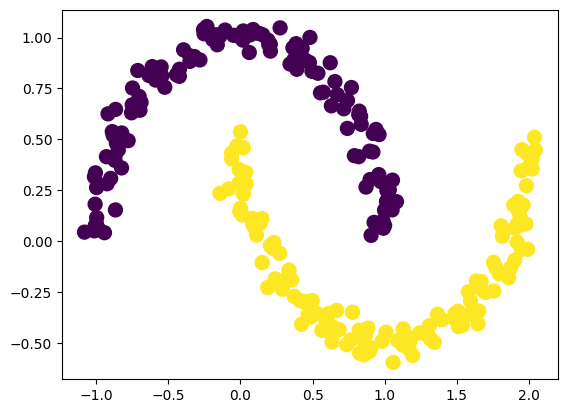

In [3]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

In [17]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,141 (4.46 KB)

 Trainable params: 1,141 (4.46 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# All weights and biases
model.get_weights()

[array([[-0.24770224, -0.41521472,  0.37626058,  0.40868753, -0.5465692 ,
         -0.14111644, -0.55891454, -0.5017235 , -0.4630983 ,  0.00356919],
        [ 0.35393256, -0.18465292,  0.5104074 , -0.15644085, -0.17475313,
          0.66446203,  0.05155754,  0.10187197,  0.42908353,  0.5314048 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.20190448,  0.4331379 ,  0.44908231,  0.20136291,  0.41281837,
         -0.29513434,  0.07614827, -0.00805879, -0.43057093,  0.20294237],
        [-0.0543986 ,  0.228427  , -0.0456388 , -0.5048769 , -0.34730682,
          0.29421747, -0.02961338, -0.2348434 , -0.42497134,  0.14247209],
        [-0.04461986, -0.20447153,  0.00917596, -0.17145973,  0.02778465,
          0.45475316,  0.30060858, -0.28250787,  0.46744823, -0.23061731],
        [ 0.452891  , -0.3313172 ,  0.5184736 , -0.08662087, -0.23123175,
          0.07221591,  0.42279512, -0.13232118, -0.04370272, -0.06262872],
        [ 0.19414

In [8]:
# taking out weights and bias of 1st layer only.
model.get_weights()[0]

array([[-0.24770224, -0.41521472,  0.37626058,  0.40868753, -0.5465692 ,
        -0.14111644, -0.55891454, -0.5017235 , -0.4630983 ,  0.00356919],
       [ 0.35393256, -0.18465292,  0.5104074 , -0.15644085, -0.17475313,
         0.66446203,  0.05155754,  0.10187197,  0.42908353,  0.5314048 ]],
      dtype=float32)

In [19]:
old_weights = model.get_weights()[0]

In [20]:
model.fit(X, y, epochs = 1, validation_split=0.2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5236 - loss: 0.7374 - val_accuracy: 0.4800 - val_loss: 0.7581


In [21]:
new_weights = model.get_weights()[0]

In [22]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [29]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = np.round(np.abs(100*(old_weights - new_weights)/ old_weights), 3)

In [27]:
gradient

array([[-0.07708371, -0.05678832,  0.03075599,  0.0628382 ,  0.03789365,
         0.04240125,  0.00791997, -0.02920627,  0.01955032, -0.03858656],
       [ 0.03585219,  0.02688169, -0.01531839, -0.02980977, -0.01806766,
        -0.02010166, -0.00369549,  0.01396239, -0.01102686,  0.01773238]],
      dtype=float32)

In [30]:
percent_change

array([[0.059, 0.055, 0.008, 0.062, 0.022, 0.041, 0.007, 0.019, 0.003,
        0.045],
       [0.008, 0.029, 0.004, 0.062, 0.015, 0.044, 0.001, 0.012, 0.002,
        0.004]], dtype=float32)

This time running for 30 epochs.

In [70]:
model2 = Sequential()

model2.add(Dense(10,activation='sigmoid',input_dim=2))
model2.add(Dense(10,activation='sigmoid'))
model2.add(Dense(10,activation='sigmoid'))
model2.add(Dense(10,activation='sigmoid'))
model2.add(Dense(10,activation='sigmoid'))
model2.add(Dense(10,activation='sigmoid'))
model2.add(Dense(10,activation='sigmoid'))
model2.add(Dense(10,activation='sigmoid'))
model2.add(Dense(10,activation='sigmoid'))
model2.add(Dense(10,activation='sigmoid'))
model2.add(Dense(10,activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
old_weights2 = model2.get_weights()[0]

In [72]:
old_weights2

array([[-0.14175737, -0.36765522,  0.11710471, -0.62272793, -0.640067  ,
        -0.18557847,  0.40955907,  0.34887677,  0.5295709 , -0.5948417 ],
       [ 0.45878178,  0.28642374,  0.70466715,  0.3756451 , -0.6152929 ,
        -0.4419382 , -0.25475764,  0.01530856, -0.02954441, -0.25714484]],
      dtype=float32)

In [74]:
history2 = model2.fit(X, y, epochs = 30, validation_split=0.2)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4501 - loss: 0.6963 - val_accuracy: 0.4800 - val_loss: 0.6941
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5051 - loss: 0.6931 - val_accuracy: 0.4800 - val_loss: 0.6940
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5191 - loss: 0.6927 - val_accuracy: 0.4800 - val_loss: 0.6940
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5123 - loss: 0.6929 - val_accuracy: 0.4800 - val_loss: 0.6940
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4761 - loss: 0.6942 - val_accuracy: 0.4800 - val_loss: 0.6937
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5118 - loss: 0.6929 - val_accuracy: 0.4800 - val_loss: 0.6938
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5148 - loss: 0.6928 - val_accuracy: 0.4800 - val_loss: 0.6936
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4969 - loss: 0.6933 - val_accuracy: 0.4800 - val_loss: 0.6933


In [75]:
new_weights2 = model2.get_weights()[0]

In [76]:
old_weights2

array([[-0.14175737, -0.36765522,  0.11710471, -0.62272793, -0.640067  ,
        -0.18557847,  0.40955907,  0.34887677,  0.5295709 , -0.5948417 ],
       [ 0.45878178,  0.28642374,  0.70466715,  0.3756451 , -0.6152929 ,
        -0.4419382 , -0.25475764,  0.01530856, -0.02954441, -0.25714484]],
      dtype=float32)

In [77]:
new_weights2

array([[-0.13496879, -0.36643618,  0.1127137 , -0.62476635, -0.64230573,
        -0.19345632,  0.42050293,  0.33696657,  0.51954967, -0.6096045 ],
       [ 0.45335713,  0.28550994,  0.7078085 ,  0.37747118, -0.6132827 ,
        -0.43589988, -0.2642215 ,  0.02533481, -0.02032239, -0.24350855]],
      dtype=float32)

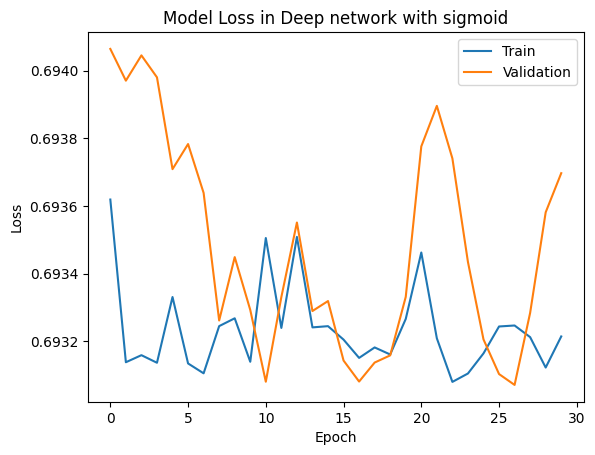

In [98]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss in Deep network with sigmoid')
plt.legend(['Train', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

This is Vanishing Gradient problem, even after 30 epochs, weights are very little changed.

<h2> Mitigation methods </h2>

1. Using shallow networks

In [65]:
model3 = Sequential()
model3.add(Dense(10,activation='sigmoid',input_dim=2))
model3.add(Dense(10,activation='sigmoid'))
model3.add(Dense(10,activation='sigmoid'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
old_weights3 = model3.get_weights()[0]

In [67]:
history3 = model3.fit(X, y, epochs = 30, validation_split=0.2)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4768 - loss: 0.6977 - val_accuracy: 0.4800 - val_loss: 0.6971
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5147 - loss: 0.6948 - val_accuracy: 0.4800 - val_loss: 0.6967
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4608 - loss: 0.6970 - val_accuracy: 0.4800 - val_loss: 0.6960
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4905 - loss: 0.6951 - val_accuracy: 0.4800 - val_loss: 0.6957
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4933 - loss: 0.6948 - val_accuracy: 0.4800 - val_loss: 0.6952
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5201 - loss: 0.6940 - val_accuracy: 0.4800 - val_loss: 0.6950
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5301 - loss: 0.6935 - val_accuracy: 0.4800 - val_loss: 0.6948
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5352 - loss: 0.6930 - val_accuracy: 0.4800 - val_loss: 0.6945
Epoch

In [87]:
new_weights3 = model3.get_weights()[0]

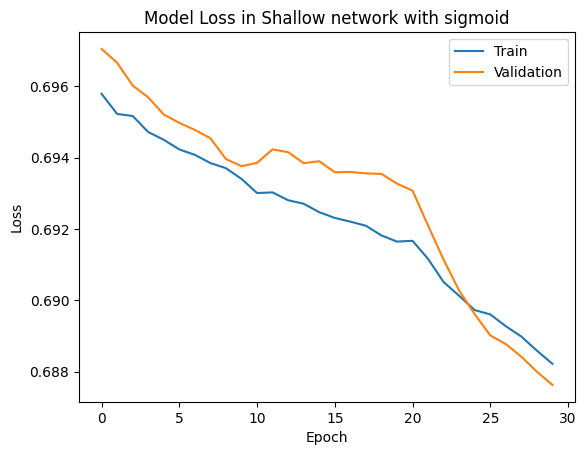

In [97]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss in Shallow network with sigmoid')
plt.legend(['Train', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

2. Using Different activation functions like ReLU.

In [101]:
model4 = Sequential()

model4.add(Dense(10,activation='relu',input_dim=2))
model4.add(Dense(10,activation='relu'))
model4.add(Dense(10,activation='relu'))
model4.add(Dense(10,activation='relu'))
model4.add(Dense(10,activation='relu'))
model4.add(Dense(10,activation='relu'))
model4.add(Dense(10,activation='relu'))
model4.add(Dense(10,activation='relu'))
model4.add(Dense(10,activation='relu'))
model4.add(Dense(10,activation='relu'))
model4.add(Dense(10,activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
old_weights4 = model4.get_weights()[0]

In [103]:
history4 = model4.fit(X, y, epochs = 30, validation_split=0.2)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.5111 - loss: 0.6927 - val_accuracy: 0.4800 - val_loss: 0.6913
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4978 - loss: 0.6903 - val_accuracy: 0.4800 - val_loss: 0.6882
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5220 - loss: 0.6862 - val_accuracy: 0.4800 - val_loss: 0.6830
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5167 - loss: 0.6801 - val_accuracy: 0.7400 - val_loss: 0.6758
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7329 - loss: 0.6731 - val_accuracy: 0.8000 - val_loss: 0.6651
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8138 - loss: 0.6619 - val_accuracy: 0.8400 - val_loss: 0.6504
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7662 - loss: 0.6451 - val_accuracy: 0.8200 - val_loss: 0.6307
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7899 - loss: 0.6287 - val_accuracy: 0.8600 - val_loss: 0.6039
Ep

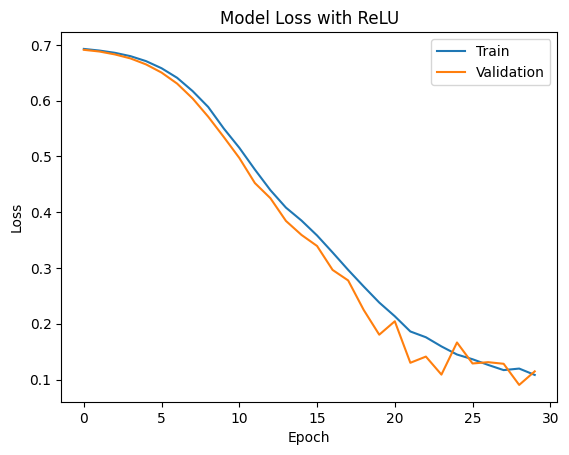

In [104]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss with ReLU')
plt.legend(['Train', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [105]:
new_weights4 = model4.get_weights()[0]

In [106]:
old_weights4

array([[ 0.09313273, -0.34676674,  0.3480901 ,  0.14434624,  0.21729434,
        -0.4869082 , -0.18136191, -0.37830016, -0.50554067,  0.27260143],
       [ 0.39936477, -0.3303888 ,  0.03930157, -0.57433814,  0.22554529,
         0.0604701 ,  0.20925403, -0.39978763,  0.11224866,  0.19098711]],
      dtype=float32)

In [107]:
new_weights4

array([[ 0.0615401 , -0.39096433,  0.36619243,  0.21088934,  0.24768326,
        -0.60518754, -0.3038951 , -0.33834648, -0.64098793,  0.41968668],
       [ 0.48043084, -0.28699946,  0.07628641, -0.55546594,  0.14451505,
         0.2042543 ,  0.27425638, -0.41722372,  0.16629043,  0.25241712]],
      dtype=float32)